In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [77]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_m15.csv")

In [78]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

In [79]:
df_original = df

del df['open']
del df['high']
del df['low']

In [80]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [81]:
df.isna().sum()

time            0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [82]:
df['SMA10'].head(20)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9     1.294261
10    1.294238
11    1.294206
12    1.294155
13    1.294082
14    1.294019
15    1.293913
16    1.293811
17    1.293723
18    1.293592
19    1.293425
Name: SMA10, dtype: float64

In [83]:
df['SMA20'].head(30)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11         NaN
12         NaN
13         NaN
14         NaN
15         NaN
16         NaN
17         NaN
18         NaN
19    1.293843
20    1.293732
21    1.293659
22    1.293578
23    1.293473
24    1.293379
25    1.293337
26    1.293252
27    1.293198
28    1.293134
29    1.293068
Name: SMA20, dtype: float64

In [84]:
df

,time,close,real_volume,SMA10,SMA20
0,2012-01-02 00:00:00,1.29459,0,NaN,NaN
1,2012-01-02 00:15:00,1.29419,0,NaN,NaN
2,2012-01-02 00:30:00,1.29408,0,NaN,NaN
3,2012-01-02 00:45:00,1.29429,0,NaN,NaN
4,2012-01-02 01:00:00,1.29429,0,NaN,NaN
...,...,...,...,...,...
247037,2021-12-30 23:00:00,1.13260,0,1.131885,1.131692
247038,2021-12-30 23:15:00,1.13269,0,1.132094,1.131702
247039,2021-12-30 23:30:00,1.13250,0,1.132256,1.131715
247040,2021-12-30 23:45:00,1.13257,0,1.132382,1.131760


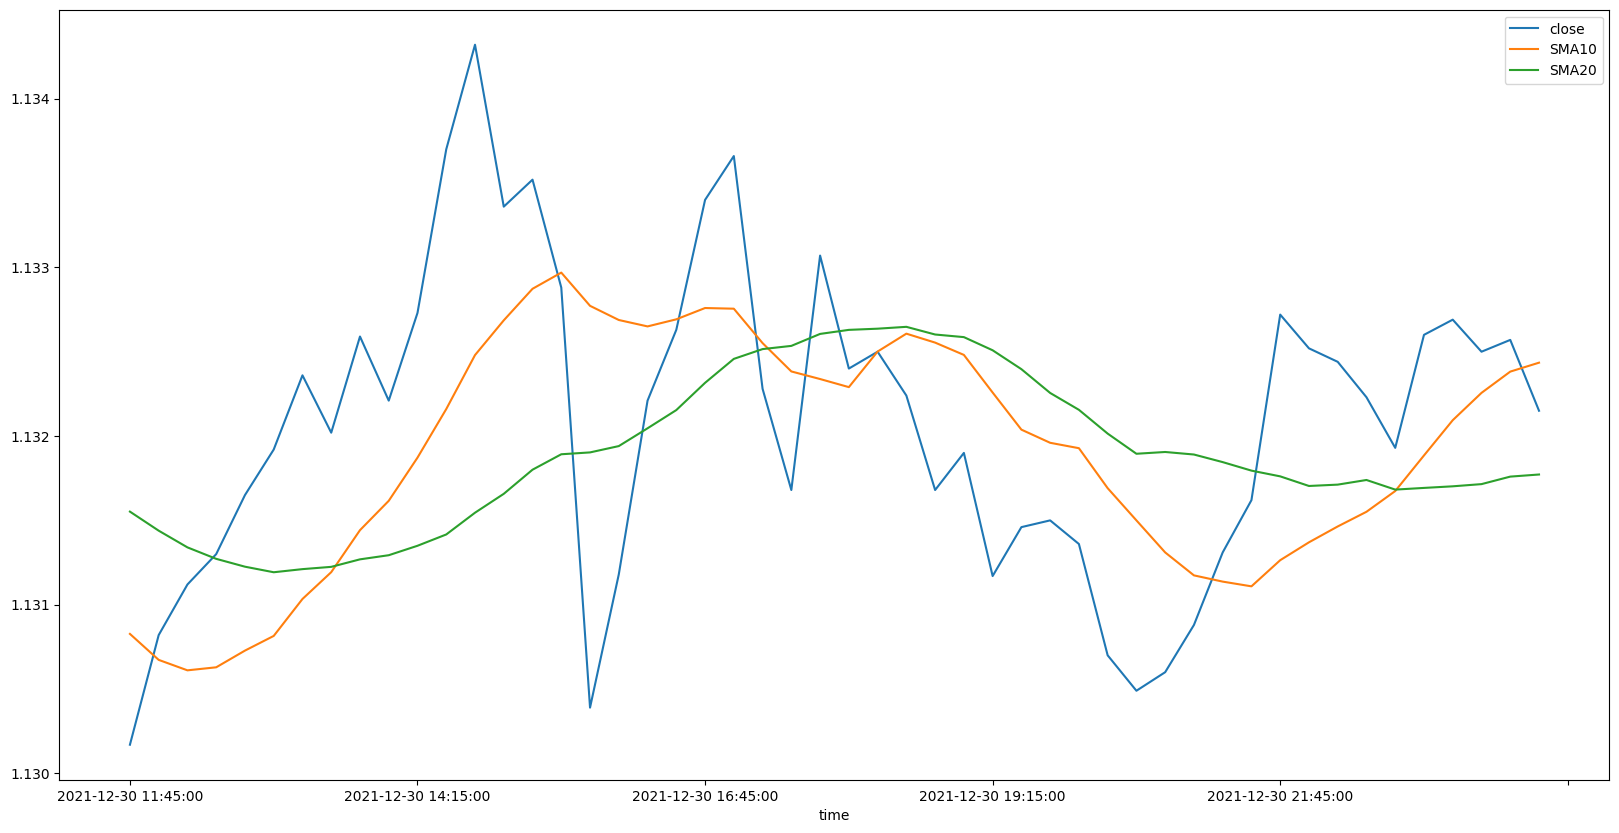

In [85]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

In [86]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [87]:
df['Signal'].value_counts()

1.0    123688
0.0    123250
Name: Signal, dtype: int64

In [88]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

In [89]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [90]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
246992,2021-12-30 11:45:00,1.13017,0,1.130827,1.131552,0.0,NaN,NaN,NaN
246993,2021-12-30 12:00:00,1.13082,0,1.130673,1.131439,0.0,NaN,NaN,NaN
246994,2021-12-30 12:15:00,1.13112,0,1.130611,1.131340,0.0,NaN,NaN,NaN
246995,2021-12-30 12:30:00,1.13130,0,1.130629,1.131272,0.0,NaN,NaN,NaN
246996,2021-12-30 12:45:00,1.13165,0,1.130728,1.131225,0.0,NaN,NaN,NaN
246997,2021-12-30 13:00:00,1.13192,0,1.130815,1.131193,0.0,NaN,NaN,NaN
246998,2021-12-30 13:15:00,1.13236,0,1.131034,1.131211,0.0,NaN,NaN,NaN
246999,2021-12-30 13:30:00,1.13202,0,1.131193,1.131225,0.0,NaN,NaN,NaN
247000,2021-12-30 13:45:00,1.13259,0,1.131442,1.131269,1.0,1.0,1.13259,NaN
247001,2021-12-30 14:00:00,1.13221,0,1.131616,1.131294,1.0,NaN,NaN,NaN


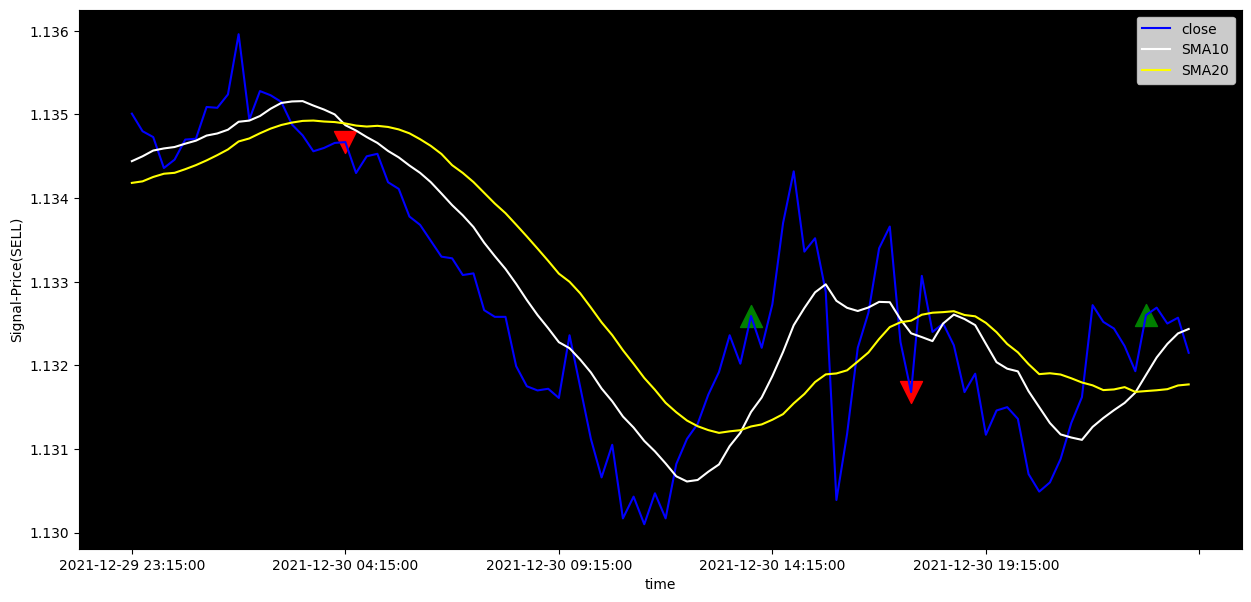

In [91]:
ax = df[['close','SMA10','SMA20','time']].tail(100).plot(x='time',legend=True,figsize=(15, 7),color=['blue','white','yellow'])
df[['time','Signal-Price(BUY)']].tail(100).plot(x='time',y='Signal-Price(BUY)',kind='scatter',ax=ax,marker='^',secondary_y=True,color='green',legend='True',s=250)
df[['time','Signal-Price(SELL)']].tail(100).plot(x='time',y='Signal-Price(SELL)',kind='scatter',ax=ax,marker='v',secondary_y=True,color='red',legend='True',s=250)
ax.set_facecolor('black')
plt.show()

In [92]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
246992,2021-12-30 11:45:00,1.13017,0,1.130827,1.131552,0.0,NaN,NaN,NaN
246993,2021-12-30 12:00:00,1.13082,0,1.130673,1.131439,0.0,NaN,NaN,NaN
246994,2021-12-30 12:15:00,1.13112,0,1.130611,1.131340,0.0,NaN,NaN,NaN
246995,2021-12-30 12:30:00,1.13130,0,1.130629,1.131272,0.0,NaN,NaN,NaN
246996,2021-12-30 12:45:00,1.13165,0,1.130728,1.131225,0.0,NaN,NaN,NaN
246997,2021-12-30 13:00:00,1.13192,0,1.130815,1.131193,0.0,NaN,NaN,NaN
246998,2021-12-30 13:15:00,1.13236,0,1.131034,1.131211,0.0,NaN,NaN,NaN
246999,2021-12-30 13:30:00,1.13202,0,1.131193,1.131225,0.0,NaN,NaN,NaN
247000,2021-12-30 13:45:00,1.13259,0,1.131442,1.131269,1.0,1.0,1.13259,NaN
247001,2021-12-30 14:00:00,1.13221,0,1.131616,1.131294,1.0,NaN,NaN,NaN


In [93]:
# x = df.index()
# while x != 0 :
#     x = x-1

df['Profit'] = np.NaN

In [94]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [95]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2012-01-02 04:45:00,1.29255,0,1.293425,1.293843,0.0,0.0,NaN,1.29255,NaN
33,2012-01-02 08:15:00,1.29434,0,1.293170,1.293017,1.0,1.0,1.29434,NaN,-0.00179
53,2012-01-02 13:15:00,1.29420,0,1.294679,1.294704,0.0,0.0,NaN,1.29420,-0.00014
82,2012-01-02 20:30:00,1.29260,0,1.292583,1.292555,1.0,1.0,1.29260,NaN,0.00160
157,2012-01-03 15:15:00,1.30339,0,1.302927,1.303096,0.0,0.0,NaN,1.30339,0.01079
...,...,...,...,...,...,...,...,...,...,...
246940,2021-12-29 22:45:00,1.13483,0,1.134255,1.134175,1.0,1.0,1.13483,NaN,-0.00095
246962,2021-12-30 04:15:00,1.13467,0,1.134872,1.134892,0.0,0.0,NaN,1.13467,-0.00016
247000,2021-12-30 13:45:00,1.13259,0,1.131442,1.131269,1.0,1.0,1.13259,NaN,0.00208
247015,2021-12-30 17:30:00,1.13168,0,1.132383,1.132534,0.0,0.0,NaN,1.13168,-0.00091


In [96]:
df['Category'] = df['Profit'].apply(lambda x: 'Profit' if x > 0 else ('Loss' if x < 0 else np.NaN))

In [97]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
82,2012-01-02 20:30:00,1.29260,0,1.292583,1.292555,1.0,1.0,1.29260,NaN,0.00160,Profit
157,2012-01-03 15:15:00,1.30339,0,1.302927,1.303096,0.0,0.0,NaN,1.30339,0.01079,Profit
223,2012-01-04 07:45:00,1.30416,0,1.303408,1.303379,1.0,1.0,1.30416,NaN,0.00055,Profit
270,2012-01-04 19:30:00,1.29512,0,1.293856,1.293552,1.0,1.0,1.29512,NaN,0.00624,Profit
287,2012-01-04 23:45:00,1.29361,0,1.294167,1.294139,1.0,1.0,1.29361,NaN,0.00062,Profit
...,...,...,...,...,...,...,...,...,...,...,...
246751,2021-12-27 23:30:00,1.13266,0,1.132648,1.132637,1.0,1.0,1.13266,NaN,0.00010,Profit
246833,2021-12-28 20:00:00,1.13060,0,1.131086,1.131054,1.0,1.0,1.13060,NaN,0.00118,Profit
246905,2021-12-29 14:00:00,1.12960,0,1.129001,1.128950,1.0,1.0,1.12960,NaN,0.00075,Profit
246931,2021-12-29 20:30:00,1.13388,0,1.134001,1.134090,0.0,0.0,NaN,1.13388,0.00428,Profit


In [98]:
df.tail(50)

,time,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
246992,2021-12-30 11:45:00,1.13017,0,1.130827,1.131552,0.0,NaN,NaN,NaN,NaN,NaN
246993,2021-12-30 12:00:00,1.13082,0,1.130673,1.131439,0.0,NaN,NaN,NaN,NaN,NaN
246994,2021-12-30 12:15:00,1.13112,0,1.130611,1.131340,0.0,NaN,NaN,NaN,NaN,NaN
246995,2021-12-30 12:30:00,1.13130,0,1.130629,1.131272,0.0,NaN,NaN,NaN,NaN,NaN
246996,2021-12-30 12:45:00,1.13165,0,1.130728,1.131225,0.0,NaN,NaN,NaN,NaN,NaN
246997,2021-12-30 13:00:00,1.13192,0,1.130815,1.131193,0.0,NaN,NaN,NaN,NaN,NaN
246998,2021-12-30 13:15:00,1.13236,0,1.131034,1.131211,0.0,NaN,NaN,NaN,NaN,NaN
246999,2021-12-30 13:30:00,1.13202,0,1.131193,1.131225,0.0,NaN,NaN,NaN,NaN,NaN
247000,2021-12-30 13:45:00,1.13259,0,1.131442,1.131269,1.0,1.0,1.13259,NaN,0.00208,Profit
247001,2021-12-30 14:00:00,1.13221,0,1.131616,1.131294,1.0,NaN,NaN,NaN,NaN,NaN


In [99]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']